In [1]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

C:\Users\cessenbe\AppData\Local\Temp\ipykernel_17528\1582392823.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\cessenbe\AppData\Local\Temp\ipykernel_17528\1582392823.py:5: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [2]:
spacex_df.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [3]:
spacex_df[['Booster Version Category', 'class', 'Flight Number']].groupby(['Booster Version Category', 'class']).count()

Flight Number
Booster Version Category class               
B4                       0                  5
                         1                  6
B5                       1                  1
FT                       0                  8
                         1                 16
v1.0                     0                  5
v1.1                     0                 14
                         1                  1

In [15]:
spacex_df[['Launch Site', 'class', 'Flight Number']].groupby(['Launch Site', 'class']).count()

Flight Number
Launch Site  class               
CCAFS LC-40  0                 19
             1                  7
CCAFS SLC-40 0                  4
             1                  3
KSC LC-39A   0                  3
             1                 10
VAFB SLC-4E  0                  6
             1                  4

In [16]:
spacex_df[['Launch Site', 'class']].groupby(['Launch Site']).count()

,class
Launch Site,
CCAFS LC-40,26
CCAFS SLC-40,7
KSC LC-39A,13
VAFB SLC-4E,10


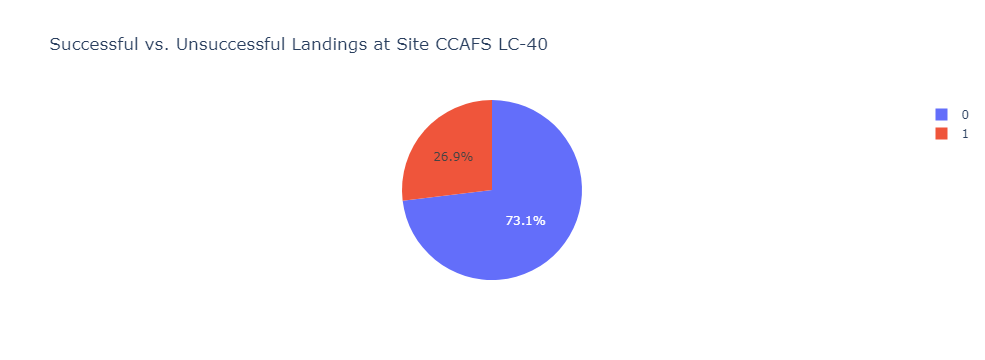

In [22]:
px.pie(spacex_df[spacex_df['Launch Site'] == 'CCAFS LC-40'],  
        names='class', labels = {'class': 'Landing success'},
        title='Successful vs. Unsuccessful Landings at Site {}'.format('CCAFS LC-40'))

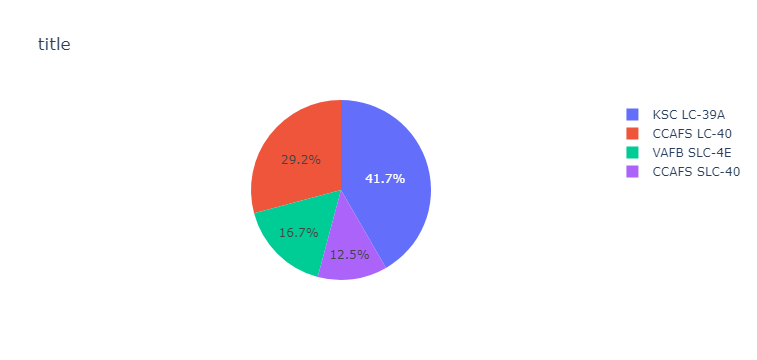

In [17]:
px.pie(spacex_df, values='class', 
        names='Launch Site', 
        title='Total Successful Landings by Site', labels={'class': 'Number of successful landings'})

In [29]:
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class', 
        names='Launch Site', 
        title='Total Successful Landings by Site',
        labels={'class': 'Number of successful landings'})
        return fig
    else:
        if entered_site:
            # return the outcomes piechart for a selected site
            fig=px.pie(filtered_df[filtered_df['Launch Site'] == entered_site],  
            names='class', labels = {'class': 'Landing success'},
            title='Successful vs. Unsuccessful Landings at Site {}'.format(entered_site))
            return fig
        else:
            return ''

In [32]:
get_pie_chart(entered_site=None)

''

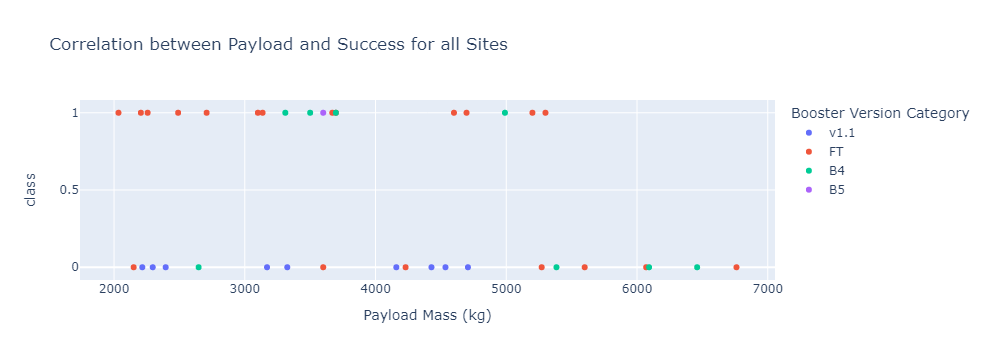

In [36]:
entered_mass = [2000, 8000]
filtered_df = spacex_df[spacex_df['Payload Mass (kg)'] > entered_mass[0]]
filtered_df = filtered_df[filtered_df['Payload Mass (kg)'] < entered_mass[1]]
fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='Booster Version Category',
title='Correlation between Payload and Success for all Sites')
fig

In [43]:
def get_scatter_chart(entered_site, entered_mass):
    filtered_df = spacex_df[spacex_df['Payload Mass (kg)'] > entered_mass[0]]
    filtered_df = filtered_df[filtered_df['Payload Mass (kg)'] < entered_mass[1]]
    if entered_site == 'ALL':       
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='Booster Version Category',
        labels = {'class': 'Landing Success'},
        title='Correlation between Payload and Success for all Sites')
        return fig
    else:
        if entered_site:
            filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]
            fig=px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='Booster Version Category',
            labels = {'class': 'Landing Success'},
            title='Correlation between Payload and Success for {}'.format(entered_site))
            return fig
        else:
            return '' 

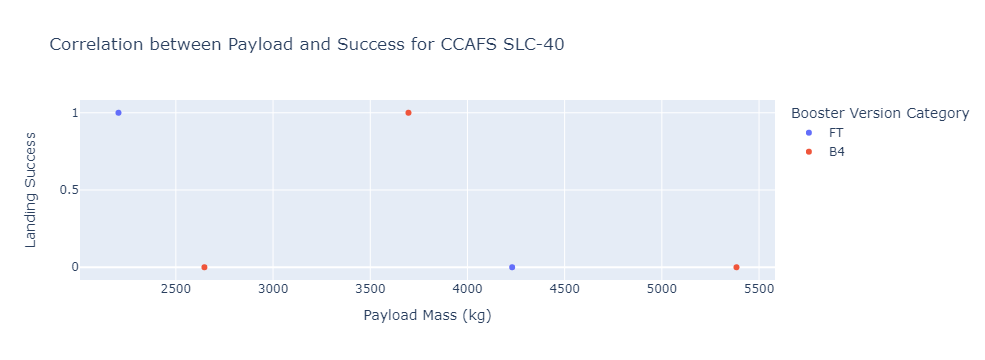

In [44]:
get_scatter_chart('CCAFS SLC-40', [2000,6000])

<h2>The whole code for the dashboard</h2>

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown', options=[
                                    {'label': 'All Sites', 'value': 'ALL'},
                                    {'label': 'CCAFS LC-40', 'value':'CCAFS LC-40'},
                                    {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                    {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                    {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
                                ], placeholder='Select a Launch Site Here', searchable = True),
                                
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider',min=0, max=10000, step=1000, 
                                marks={0:'0', 2000: '2000', 4000: '4000', 6000: '6000', 8000:'8000', 10000:'10000'},
                                value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
# Pie chart function
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class', 
        names='Launch Site', 
        title='Total Successful Landings by Site',
        labels={'class': 'Number of successful landings'})
        return fig
    else:
        if entered_site:
            # return the outcomes piechart for a selected site
            fig=px.pie(filtered_df[filtered_df['Launch Site'] == entered_site],  
            names='class', labels = {'class': 'Landing success'},
            title='Successful vs. Unsuccessful Landings at Site {}'.format(entered_site))
            return fig
        else:
            return ''
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
# Function decorator to specify function inputs and output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='site-dropdown', component_property='value'),
              Input(component_id="payload-slider", component_property="value")])
# Scatter chart function
def get_scatter_chart(entered_site, entered_mass):
    filtered_df = spacex_df[spacex_df['Payload Mass (kg)'] > entered_mass[0]]
    filtered_df = filtered_df[filtered_df['Payload Mass (kg)'] < entered_mass[1]]
    if entered_site == 'ALL':       
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='Booster Version Category',
        labels={'class': 'Landing Success'},
        title='Correlation between Payload and Success for all Sites')
        return fig
    else:
        if entered_site:
            filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]
            fig=px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='Booster Version Category',
            labels={'class': 'Landing Success'},
            title='Correlation between Payload and Success for {}'.format(entered_site))
            return fig
        else:
            return ''              

# Run the app
if __name__ == '__main__':
    app.run_server()


C:\Users\cessenbe\AppData\Local\Temp\ipykernel_20356\935534024.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\cessenbe\AppData\Local\Temp\ipykernel_20356\935534024.py:5: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [01/Sep/2022 17:42:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2022 17:42:38] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_6_1m1661519874.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2022 17:42:38] "GET /_dash-component-suites/dash/deps/react@16.v2_6_1m1661519874.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2022 17:42:38] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_6_1m1661519874.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2022 17:42:38] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_6_1m1661519874.min.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2022 17:42:38] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_6_1m1661519874.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2022 17:42:38] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_6_1m1661519874.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2022 17:42:38] "GET /_dash-component-suites/dash